<h1>Introduction</h1>
The goal of this project is to anaylse biodiversity data from National Parks in the USA.

The project will scope, prepare, analyse and plot data, and then seek to explain the findings.

Some of the questions the project seeks to answer are:
- Biodiversity Analysis: Which parks have the highest and lowest biodiversity.
- Species Distribution: What is the distribution of different species categories (e.g., birds, mammals, etc.) across different parks.
- Which animals are the most prevalent and which animals are the least prevalent.
- Are certain types of species more likely to be endangered?

<h3>Data Sources</h3>

The data provided includes two csv files:
- species.csv provides data about each species and its conservation status. 
- observations.csv provides data about the observations of each species, and the National Park where the observation occured.

This data has been provided by codecademy.com


<h2>Scoping</h2>

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

<h3>Project Goals</h3>

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

    Which parks have the most biodiversity, and which parks have the least?
    Are certain types of species more likely to have a conservation status?
    Which parks have the greatest number of species with a conservation status?
    Which animals are the most and least prevalent and what is their distribution amongst parks?

<h3>Data</h3>

This project has two data sets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.
Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

    Distributions
    Counts
    Conservation status of species
    Observations of species in parks.

<h3>Evaluation</h3>

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

<h3>Reading the Data</h3>

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [197]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [198]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


<h2>Cleaning the data</h2>


Lets check for duplicates in both files

In [4]:
observations.duplicated().sum()

15

In [5]:
observations = observations.drop_duplicates()

In the species _info file, the common_names column provides different names for the same species. This will impact the duplicated method. We only want to have one record for each scientific name, so we check the subset scientific_name. Doing it this way will drop the other common_names that have been recorded against the species, but I am okay with that.

In [18]:
species_info.duplicated(subset='scientific_name').sum()

0

In [19]:
species_info = species_info.drop_duplicates(subset='scientific_name')

In [52]:
# Later on in the project I alsno noticed that there were multiple rows for recording observations for the same species in the same park. I fixed this by doing the following:
observations = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

In [58]:
observations.isna().sum()

park_name          0
scientific_name    0
observations       0
dtype: int64

In [59]:
species_info.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5363
dtype: int64

The park name column is quite long. I am going to replace 'National Park', with 'NP'. This will also make it easier when we are labelling data visualizations.

In [151]:
observations['park_name'] = observations['park_name'].str.replace('National Park', 'NP')

In [152]:
grouped = species_info.groupby('scientific_name').filter(lambda x: x['conservation_status'].nunique() > 1)

In [153]:
# We are going to remove the instances of gray wolf where it is set to endangered. There are 715 sightings of gray wolf, so it is morelikely to sit in recovery.
mask = ~((species_info['scientific_name'] == 'Canis lupus') & (species_info['conservation_status'] == 'Endangered'))
species_info = species_info[mask]


In [186]:
merged_df = pd.merge(species_info, observations, on='scientific_name')

<h2>Which parks have the most biodiversity, and which parks have the least?</h2>

In [187]:
biodiversity_by_park = observations.groupby('park_name')['scientific_name'].nunique()
print(biodiversity_by_park)

park_name
Bryce NP                    5541
Great Smoky Mountains NP    5541
Yellowstone NP              5541
Yosemite NP                 5541
Name: scientific_name, dtype: int64


<h3>Each park has the same species present, but how many observations of these species are there?</h3> 

In [188]:
observation_totals = observations.groupby('park_name')['observations'].sum()
print(observation_totals)

park_name
Bryce NP                     576025
Great Smoky Mountains NP     431820
Yellowstone NP              1443562
Yosemite NP                  863332
Name: observations, dtype: int64


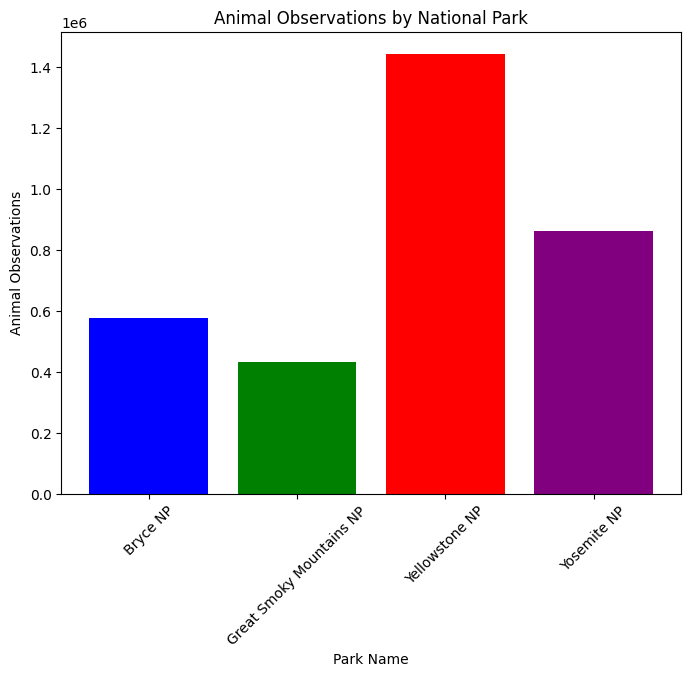

<Figure size 640x480 with 0 Axes>

In [189]:
plt.figure(figsize=(8,6))
plt.bar(observation_totals.index, observation_totals.values, color=['blue','green','red','purple'])
plt.xlabel('Park Name')
plt.ylabel('Animal Observations')
plt.title('Animal Observations by National Park')
plt.xticks(rotation=45)
plt.show()
plt.clf()

Based on total observations, Yellowstone has the highest number of species, whereas Great Smoky Mountains has the least. However this doesn't take into account the size of the parks. Each park is quite different in size and that is important. I think a better indication of the abundance of wildlife is to look at the amount of wildlife per km2. Here are the sizes of each park in km2:
- 'Bryce NP': 145.02,
- 'Great Smoky Mountains NP': 2114.16,
- 'Yellowstone NP': 8991,
- 'Yosemite NP': 3027

One other thing to consider is how the observations were recorded. Do the number of recorders reflect the size of the park? For example it would be easier to collect observations in a smaller park than a larger park. If the observations were using cameras, were the same number of cameras distributed throughout the parks, or were the cameras placed every km2? We don't have this data so it's hard to know. I think it is important to be aware of this.

In [190]:
park_sizes = {
    'Bryce NP': 145.02,
    'Great Smoky Mountains NP': 2114.16,
    'Yellowstone NP': 8991,
    'Yosemite NP': 3027
}


# Working out the number of observations per km2
observation_density = {}
for park, total in observation_totals.items():
    observation_density[park] = round(total/park_sizes[park], 2)

print(observation_density)
    
    
    

{'Bryce NP': 3972.04, 'Great Smoky Mountains NP': 204.25, 'Yellowstone NP': 160.56, 'Yosemite NP': 285.21}


According to this  Bryce National Park, has the greatest abundance of biodiversity per square kilometer. Let's show this in a graph.

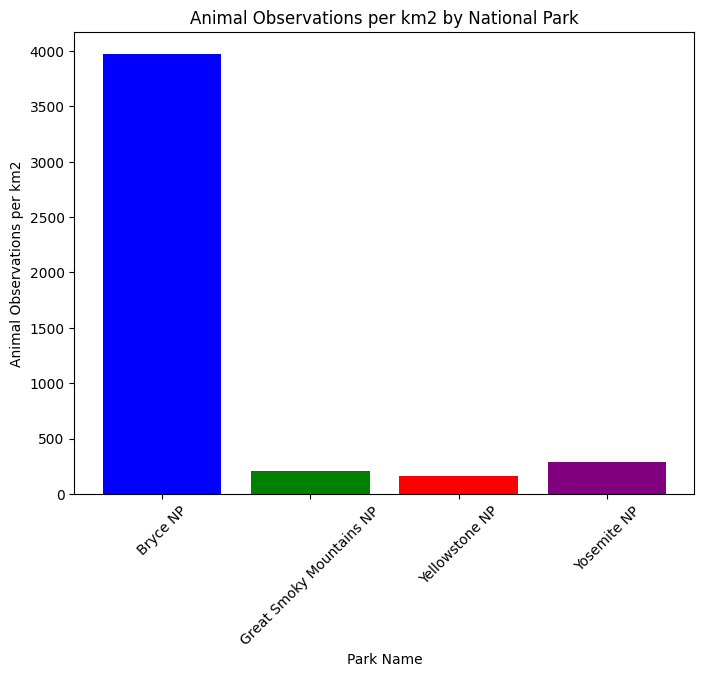

<Figure size 640x480 with 0 Axes>

In [191]:
plt.figure(figsize=(8,6))
plt.bar(observation_density.keys(), observation_density.values(), color=['blue','green','red','purple'])
plt.xlabel('Park Name')
plt.ylabel('Animal Observations per km2')
plt.title('Animal Observations per km2 by National Park')
plt.xticks(rotation=45)
plt.show()
plt.clf()

<h2>Are certain categories of animals more likely to be have a conservation status?</h2>

In [192]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


<h3>For each category, how many species have some form of conservation status?</h3>

In [193]:
# Selecting the species without a null conservation status
conservation_species = species_info[species_info['conservation_status'].notnull()]
conservation_counts = conservation_species['category'].value_counts()

# Sorting the result
conservation_counts_sorted = conservation_counts.sort_index()
print(conservation_counts_sorted)

category
Amphibian             7
Bird                 79
Fish                 11
Mammal               36
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
Name: count, dtype: int64


<h3>What percentage of each category, have some form of conservation status?</h3>

In [194]:
# Working out the total number of species in each category
total_counts = species_info['category'].value_counts()
total_counts_sorted = total_counts.sort_index()
print(total_counts_sorted)

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                212
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: count, dtype: int64


In [195]:
# Calculate the percentage of each category that has a conservation status
conservation_percentage = (conservation_counts_sorted / total_counts_sorted) * 100

# Sorting the result
conservation_percentage_sorted = conservation_percentage.sort_values()
print(conservation_percentage_sorted)

category
Vascular Plant        1.029083
Nonvascular Plant     1.501502
Reptile               6.329114
Fish                  8.661417
Amphibian             8.750000
Bird                 15.163148
Mammal               16.981132
Name: count, dtype: float64


<h3>The data shows that the mammals have the most species that have a conservation status, and vascular plants have the least species that are endangered. Lets show this in a graph</h3>

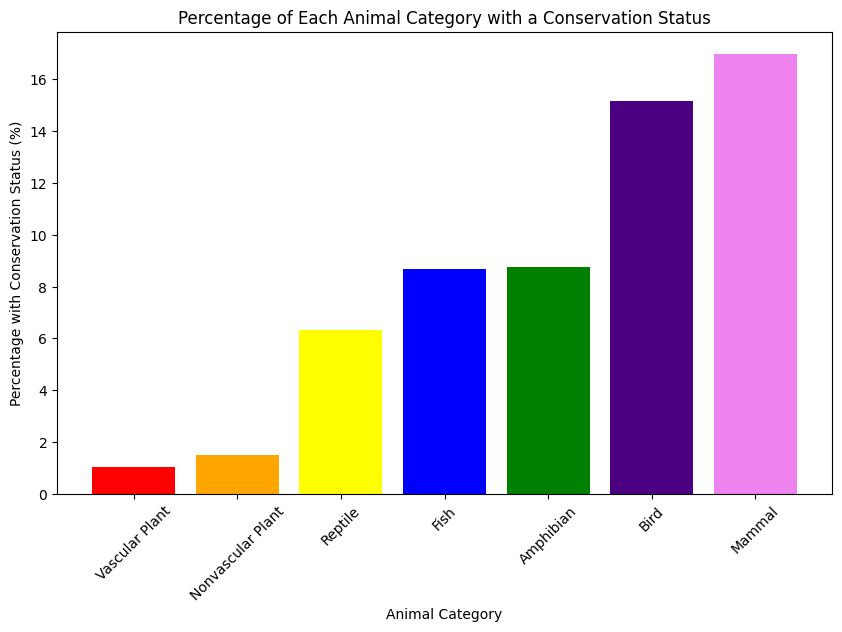

In [196]:
plt.figure(figsize=(10, 6))
plt.bar(conservation_percentage_sorted.index, conservation_percentage_sorted.values, color=['red','orange','yellow','blue','green','indigo','violet'])
plt.xlabel('Animal Category')
plt.ylabel('Percentage with Conservation Status (%)')
plt.title('Percentage of Each Animal Category with a Conservation Status')
plt.xticks(rotation=45)
plt.show()

<h2>Which parks have the greatest number of species with a conservation status?</h2>

To answer this we will create a list of all the species that have a conservation status, and then we will sum the total number of observations of these species in each park.

In [197]:
conserved_species = species_info[species_info['conservation_status'].notnull()]

In [198]:
print(conserved_species.head())

   category            scientific_name  \
7    Mammal              Canis latrans   
9    Mammal                Canis rufus   
29   Mammal           Eptesicus fuscus   
30   Mammal  Lasionycteris noctivagans   
33   Mammal      Myotis austroriparius   

                               common_names conservation_status  
7                                    Coyote  Species of Concern  
9                                  Red Wolf          Endangered  
29                            Big Brown Bat  Species of Concern  
30                        Silver-Haired Bat  Species of Concern  
33  Mississippi Myotis, Southeastern Myotis  Species of Concern  


In [199]:
conservation_observation = observations[observations['scientific_name'].isin(conserved_species['scientific_name'])]

In [200]:
park_observations = conservation_observation.groupby('park_name')['observations'].sum()

In [201]:
park_observations

park_name
Bryce NP                    16263
Great Smoky Mountains NP    11277
Yellowstone NP              39035
Yosemite NP                 23533
Name: observations, dtype: int64

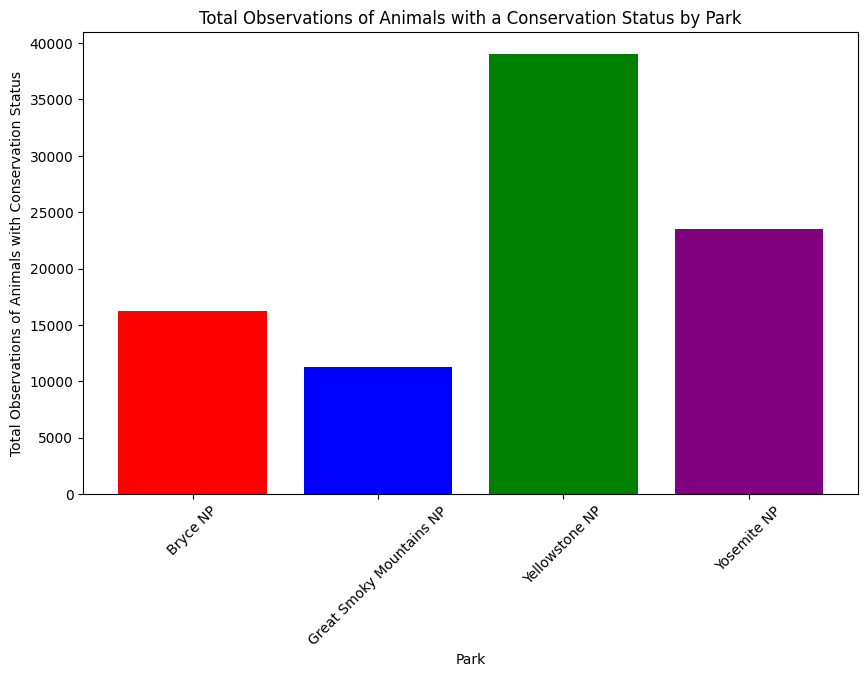

In [202]:
plt.figure(figsize=(10, 6))
plt.bar(park_observations.index, park_observations.values, color=['red','blue','green','purple'])
plt.xlabel('Park')
plt.ylabel('Total Observations of Animals with Conservation Status')
plt.title('Total Observations of Animals with a Conservation Status by Park')
plt.xticks(rotation=45)
plt.show()

This is unsurprising since Yellowstone is much larger than the other parks. Let's look at the density of observations like we did previously.

In [203]:
park_sizes = {
    'Bryce NP': 145.02,
    'Great Smoky Mountains NP': 2114.16,
    'Yellowstone NP': 8991,
    'Yosemite NP': 3027
}


park_observation_density = {}
for park, total in park_observations.items():
    park_observation_density[park] = round(total/park_sizes[park], 2)

print(park_observation_density)

{'Bryce NP': 112.14, 'Great Smoky Mountains NP': 5.33, 'Yellowstone NP': 4.34, 'Yosemite NP': 7.77}


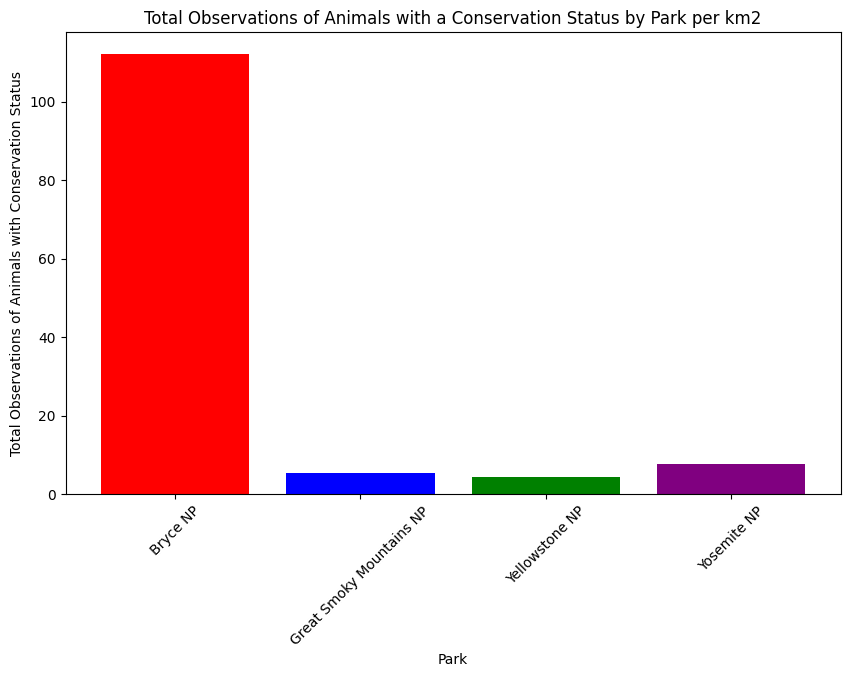

In [204]:
plt.figure(figsize=(10, 6))
plt.bar(park_observation_density.keys(), park_observation_density.values(), color=['red','blue','green','purple'])
plt.xlabel('Park')
plt.ylabel('Total Observations of Animals with Conservation Status')
plt.title('Total Observations of Animals with a Conservation Status by Park per km2')
plt.xticks(rotation=45)
plt.show()

<h2>What is the distribution of endangered species?</h2>

In [205]:
endangered_species = species_info[species_info['conservation_status'] == 'Endangered']
endangered_species

,category,scientific_name,common_names,conservation_status
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Whooping Crane,Endangered
276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
570,Fish,Noturus baileyi,Smoky Madtom,Endangered
2497,Vascular Plant,Geum radiatum,"Mountain Avens, Spreading Avens",Endangered


In [206]:
endangered_species.count()

category               14
scientific_name        14
common_names           14
conservation_status    14
dtype: int64

There are a total of 15 endangered species. Let's take a look at the observations for each species.

In [207]:
endangered_observations = pd.merge(endangered_species, observations, on='scientific_name')
endangered_observations.head(60)

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Canis rufus,Red Wolf,Endangered,Bryce NP,30
1,Mammal,Canis rufus,Red Wolf,Endangered,Yosemite NP,34
2,Mammal,Canis rufus,Red Wolf,Endangered,Great Smoky Mountains NP,13
3,Mammal,Canis rufus,Red Wolf,Endangered,Yellowstone NP,60
4,Mammal,Myotis grisescens,Gray Myotis,Endangered,Bryce NP,27
5,Mammal,Myotis grisescens,Gray Myotis,Endangered,Yellowstone NP,68
6,Mammal,Myotis grisescens,Gray Myotis,Endangered,Yosemite NP,39
7,Mammal,Myotis grisescens,Gray Myotis,Endangered,Great Smoky Mountains NP,26
8,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,Yosemite NP,36
9,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,Great Smoky Mountains NP,14


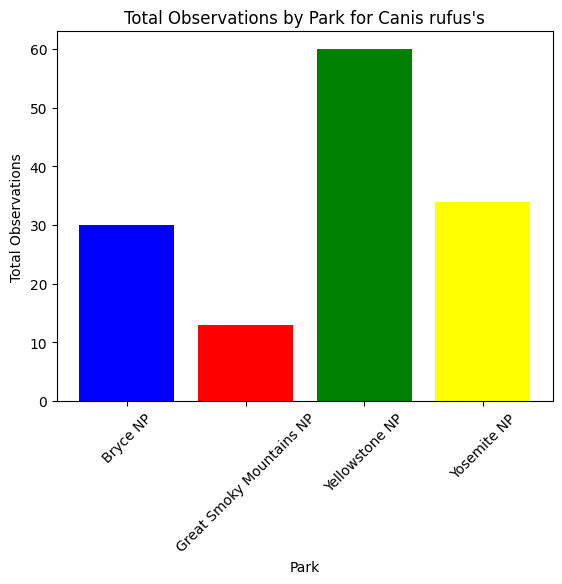

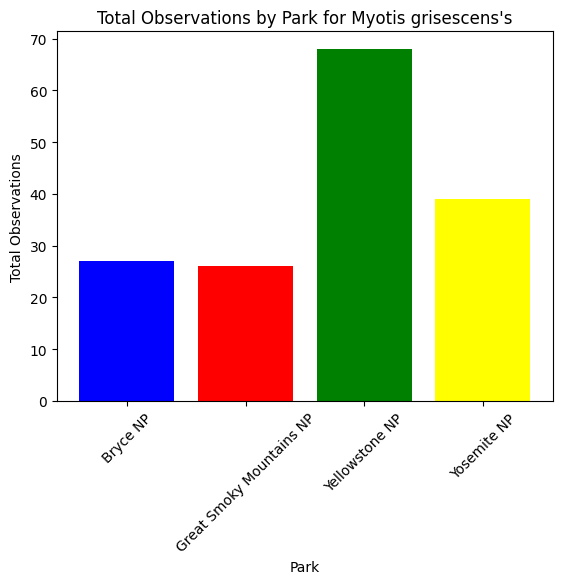

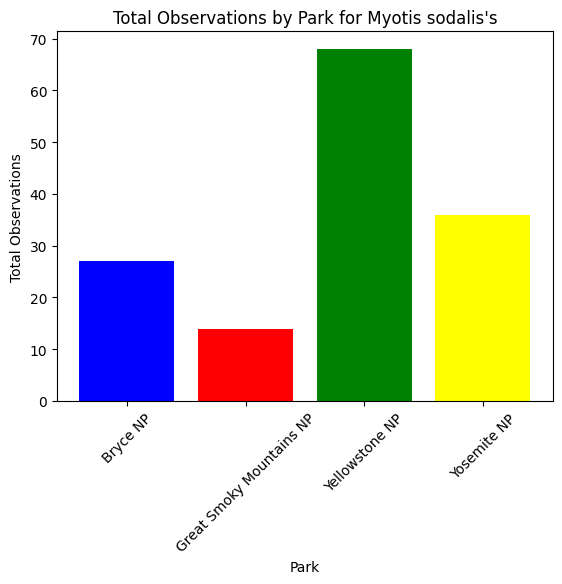

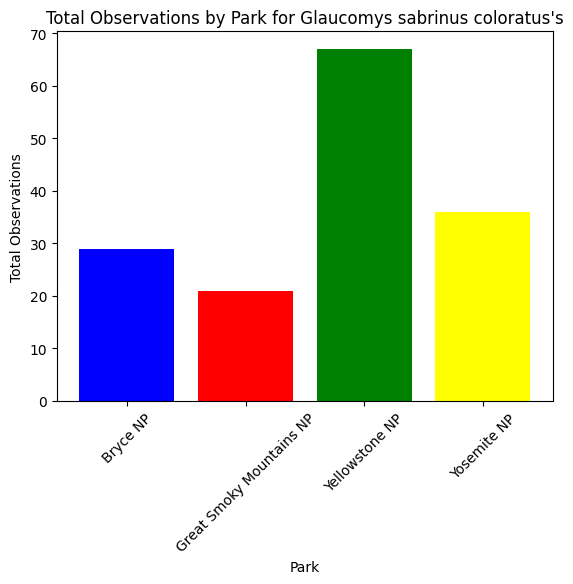

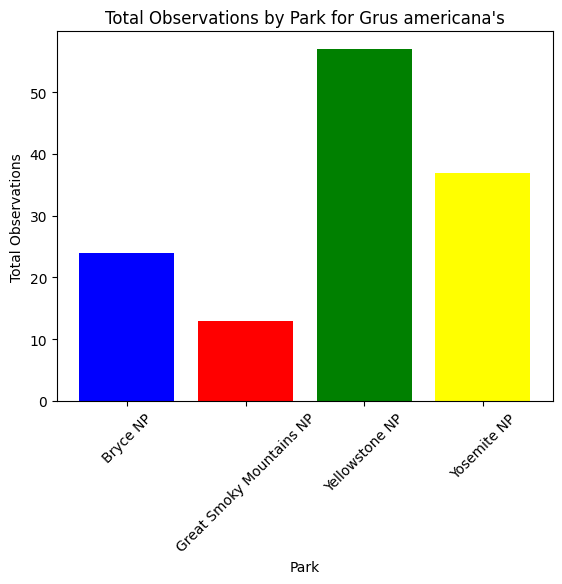

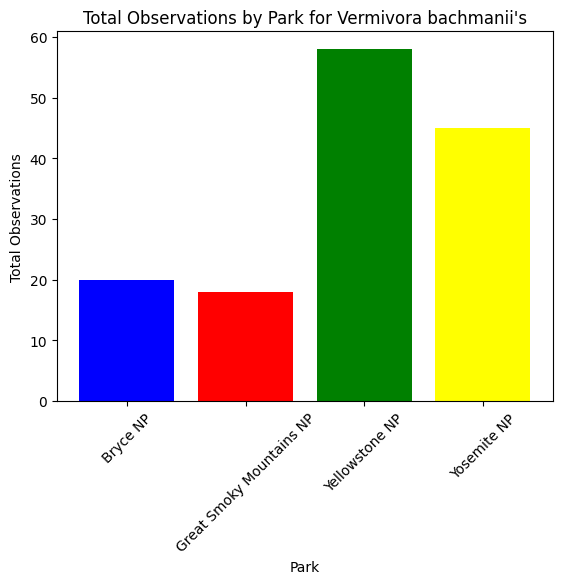

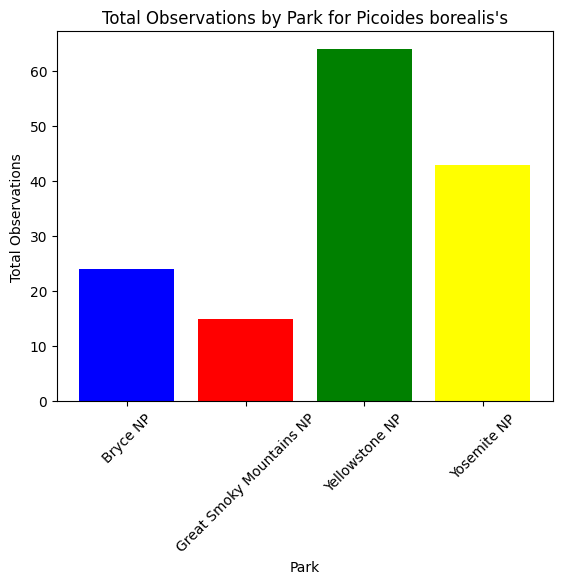

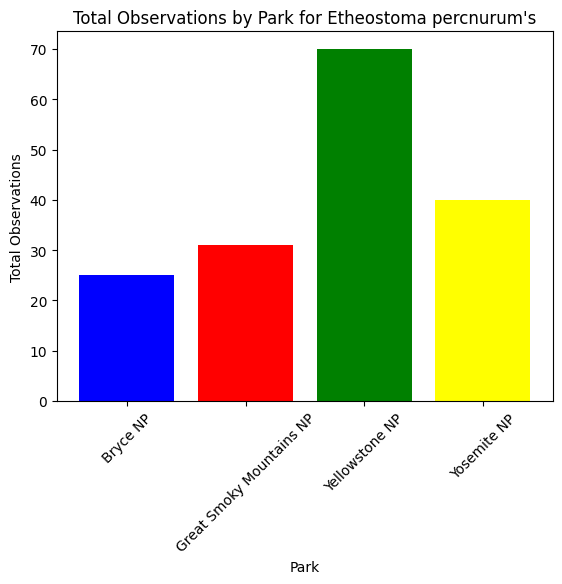

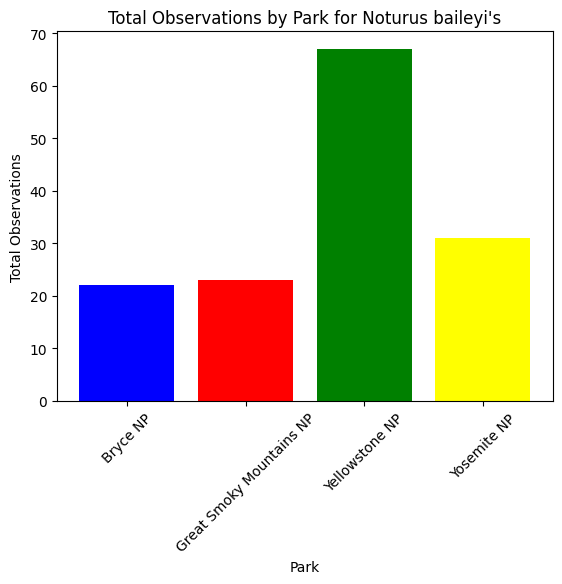

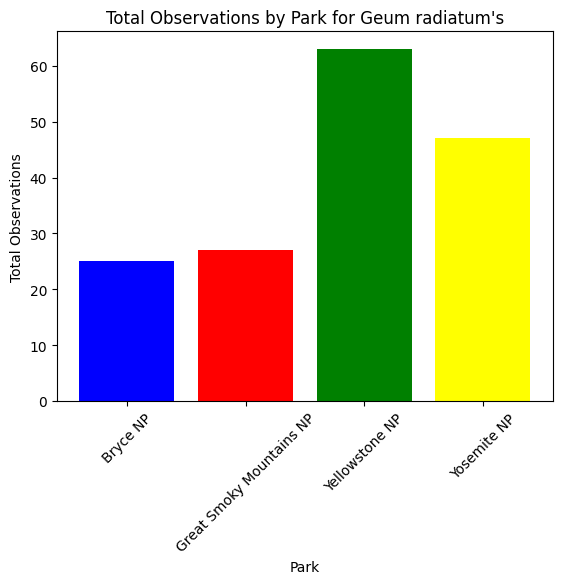

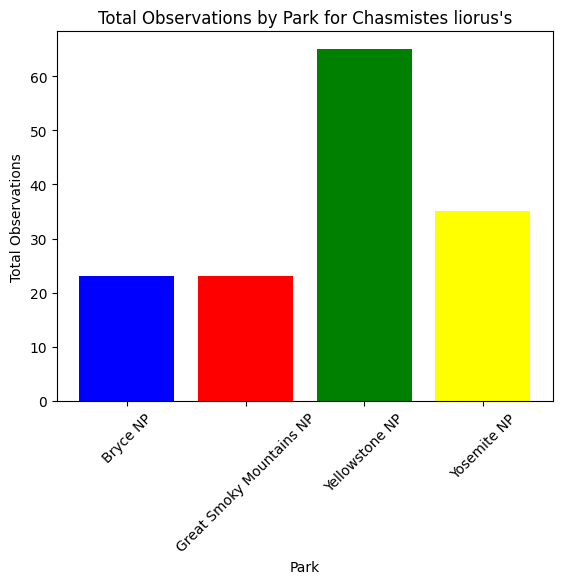

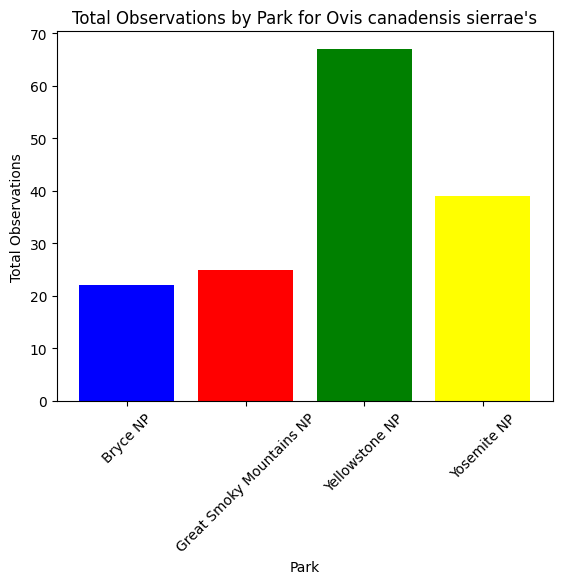

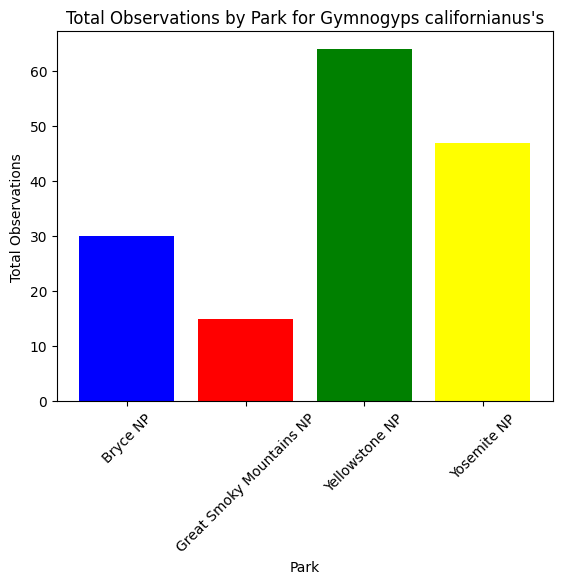

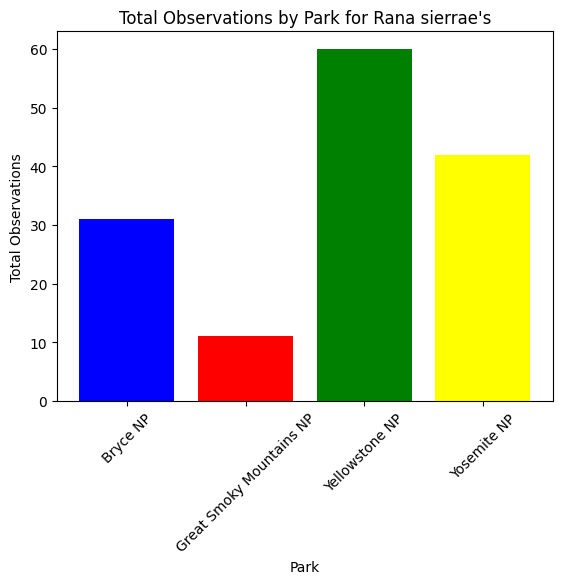

In [208]:

endangered_categories = endangered_species['scientific_name'].unique()

for species in endangered_categories:
    # Selecting all the instances of the current species
    species_data = endangered_observations[endangered_observations['scientific_name'] == species]
    #calculating the total observations of the species by park.
    park_observations = species_data.groupby('park_name')['observations'].sum()
    #plotting the observations by park
    plt.bar(park_observations.index, park_observations.values, width=0.8, color=['blue','red','green','yellow'])
    plt.xlabel('Park')
    plt.ylabel('Total Observations')
    plt.title(f'Total Observations by Park for {species}\'s')
    plt.xticks(rotation=45)
    plt.show()
    

There are quite a high number of observations for Canis Lupis (Gray Wolves). It would be interesting to look at the distrbution of total observations of endangered species, and determine whether the number of gray wolves observed is statisically significant.

<h2>What is the distribution of observations of Endangered species?</h2>

In [209]:
endangered_observations_sum = endangered_observations.groupby(['scientific_name'])['observations'].sum().reset_index()
endangered_observations_sum

,scientific_name,observations
0,Canis rufus,137
1,Chasmistes liorus,146
2,Etheostoma percnurum,166
3,Geum radiatum,162
4,Glaucomys sabrinus coloratus,153
5,Grus americana,131
6,Gymnogyps californianus,156
7,Myotis grisescens,160
8,Myotis sodalis,145
9,Noturus baileyi,143


In [210]:
endangered_observations_sum.describe()

,observations
count,14.000000
mean,148.785714
std,9.947389
min,131.000000
25%,143.250000
50%,146.000000
75%,155.250000
max,166.000000


In [211]:
species_info['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [212]:
concerned_species_obs = merged_df[merged_df['conservation_status'] == 'Species of Concern'].groupby(['scientific_name'])['observations'].sum().reset_index()
threatened_species_obs = merged_df[merged_df['conservation_status'] == 'Threatened'].groupby(['scientific_name'])['observations'].sum().reset_index()
recovery_species_obs = merged_df[merged_df['conservation_status'] == 'In Recovery'].groupby(['scientific_name'])['observations'].sum().reset_index()
no_status_species_obs = merged_df[merged_df['conservation_status'].isna()].groupby(['scientific_name'])['observations'].sum().reset_index()

In [213]:
concerned_species_obs.describe()

,observations
count,151.000000
mean,622.264901
std,482.337692
min,441.000000
25%,490.000000
50%,515.000000
75%,544.500000
max,4641.000000


In [214]:
threatened_species_obs.describe()

,observations
count,10.000000
mean,333.900000
std,169.206941
min,242.000000
25%,274.500000
50%,283.500000
75%,298.250000
max,813.000000


In [215]:
recovery_species_obs.describe()

,observations
count,4.000000
mean,526.750000
std,125.614158
min,457.000000
25%,463.000000
50%,467.500000
75%,531.250000
max,715.000000


In [216]:
no_status_species_obs.describe()

,observations
count,5363.000000
mean,660.512027
std,402.986337
min,451.000000
25%,547.000000
50%,575.000000
75%,605.000000
max,5355.000000


<h2>Lets look at the distribution of endangered species</h2>

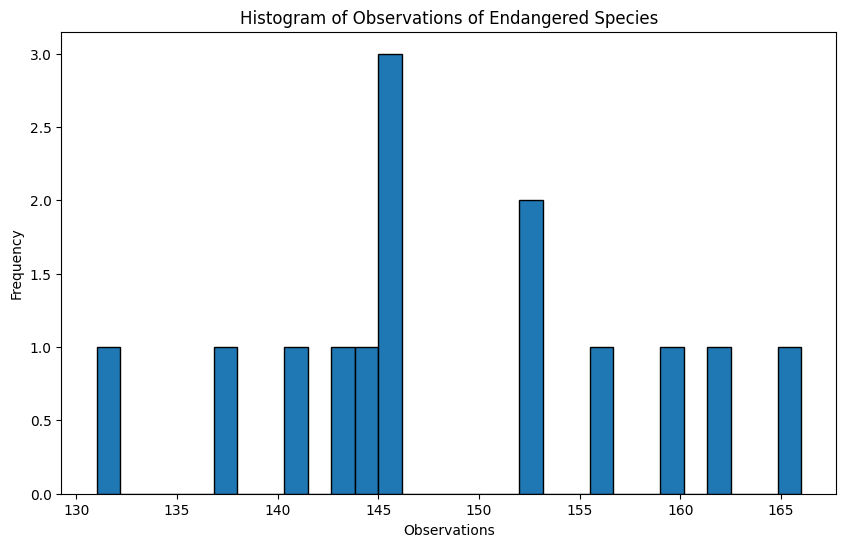

In [218]:
plt.figure(figsize=(10, 6))
plt.hist(endangered_observations_sum['observations'], bins=30, edgecolor='black')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Histogram of Observations of Endangered Species')
plt.show()


In [219]:
from scipy.stats import shapiro, skew, kurtosis

# Calculate skewness and kurtosis
data_skewness = skew(endangered_observations_sum['observations'])
data_kurtosis = kurtosis(endangered_observations_sum['observations'])

print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

# Perform Shapiro-Wilk test for normality
stat, p = shapiro(endangered_observations_sum['observations'])

print(f"Shapiro-Wilk test statistic: {stat}")
print(f"Shapiro-Wilk test p-value: {p}")


Skewness: 0.09797560540489203
Kurtosis: -0.7793773722278727
Shapiro-Wilk test statistic: 0.973440408706665
Shapiro-Wilk test p-value: 0.9189780950546265


<h2>Which animals are the most and least prevalent and what is their distribution amongst parks?</h2>

To answer this question, the first step is to  group the observations by animal category, and then sum the total observations for each category.  The observations and category are in seperate files, so I need to merge the files on the scientific_name column first.

In [249]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains NP,68
1,Neovison vison,Great Smoky Mountains NP,77
2,Prunus subcordata,Yosemite NP,138
3,Abutilon theophrasti,Bryce NP,84
4,Githopsis specularioides,Great Smoky Mountains NP,85


In [250]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [251]:
merged_df = pd.merge(observations, species_info, on='scientific_name')

In [252]:
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains NP,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite NP,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone NP,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce NP,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains NP,77,Mammal,American Mink,NaN


In [253]:
category_distribution = merged_df.groupby(['category', 'park_name'])['observations'].sum()
print(category_distribution)

category           park_name               
Amphibian          Bryce NP                       7380
                   Great Smoky Mountains NP       5707
                   Yellowstone NP                19440
                   Yosemite NP                   11444
Bird               Bryce NP                      51647
                   Great Smoky Mountains NP      37728
                   Yellowstone NP               126996
                   Yosemite NP                   76207
Fish               Bryce NP                      12423
                   Great Smoky Mountains NP       9206
                   Yellowstone NP                30574
                   Yosemite NP                   18615
Mammal             Bryce NP                      20550
                   Great Smoky Mountains NP      15012
                   Yellowstone NP                50539
                   Yosemite NP                   30339
Nonvascular Plant  Bryce NP                      32992
                   Gr

The most common category is Vascular Plants, the least common category are Amphibians. It is quite hard to read this data as it is, so it would be ideal to put this into a graph to visualize it better. Becuase there are so much to show, I think it is best to create a seperate graph for each cateogory that shows the distribution of that category across the 4 different parks. 

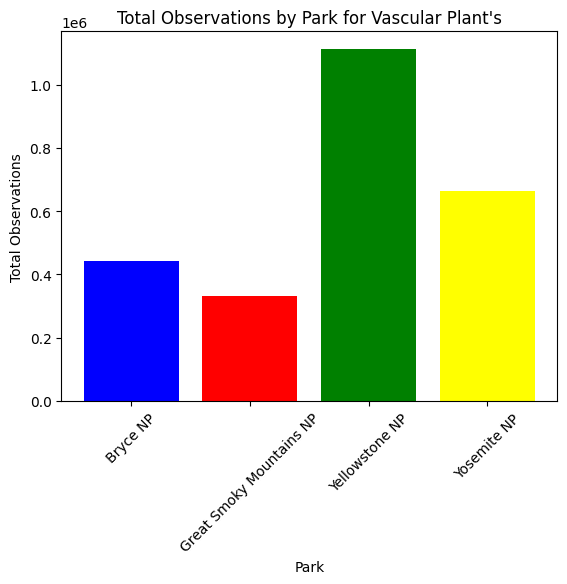

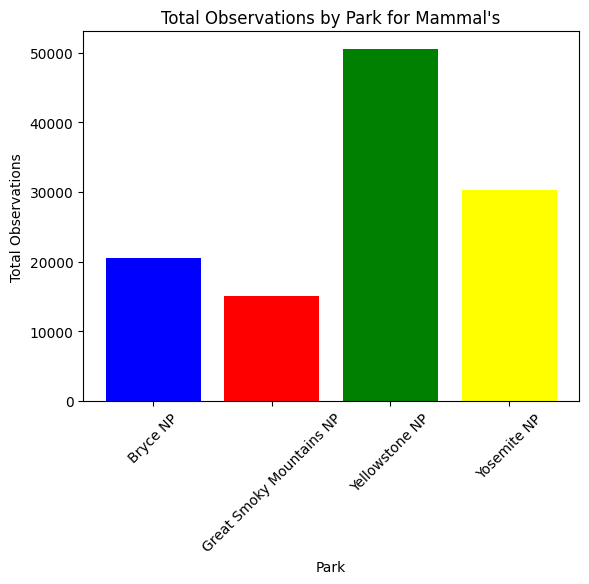

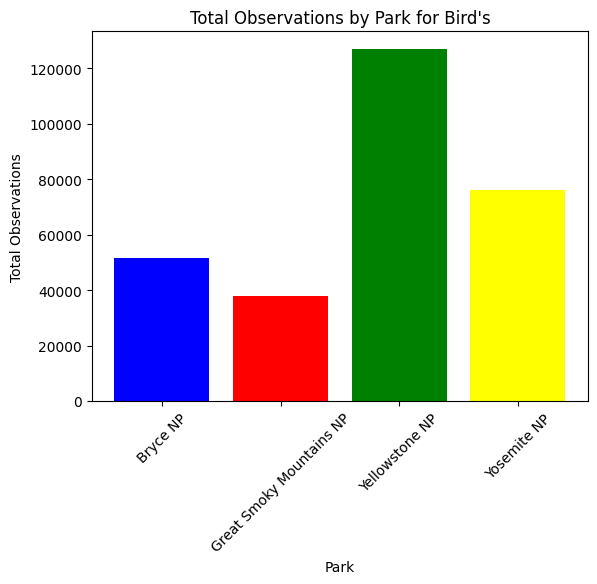

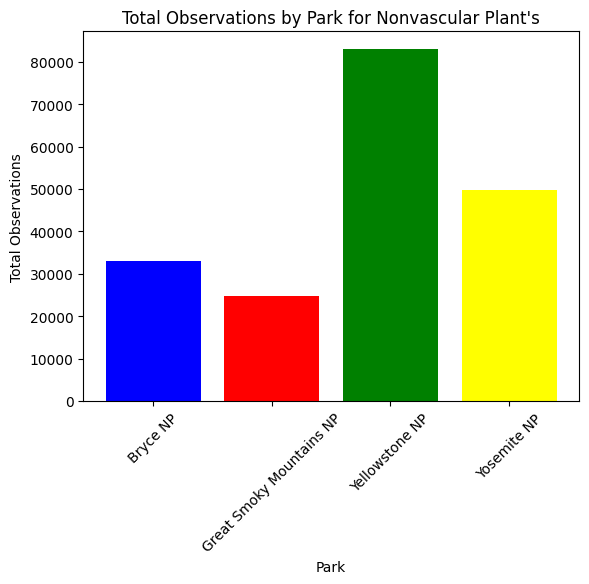

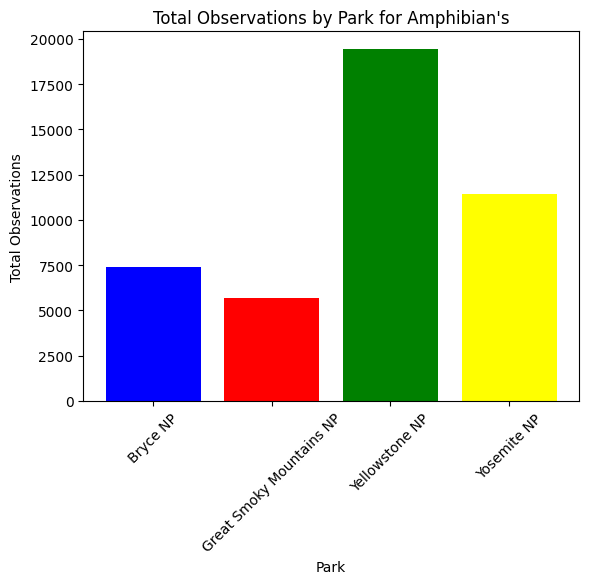

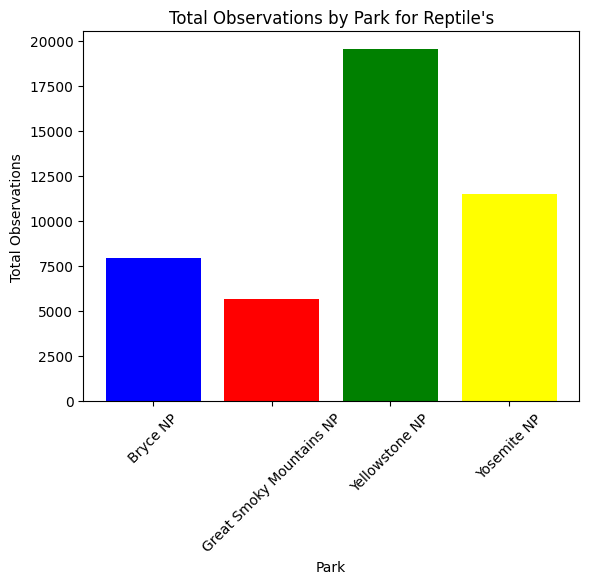

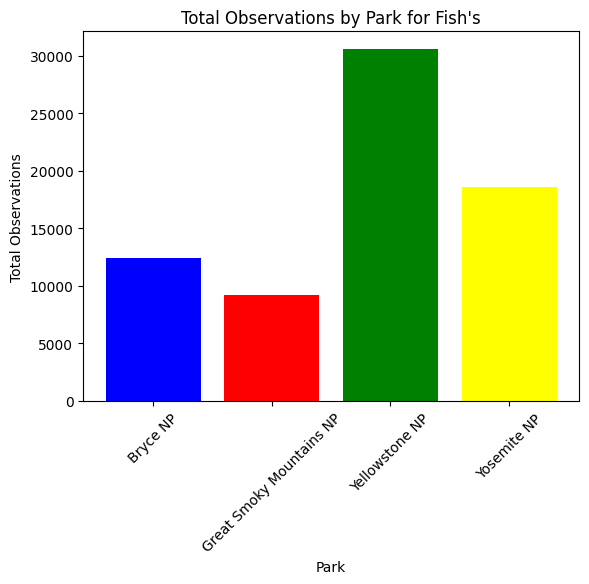

In [254]:

categories = merged_df['category'].unique()
#the park names are quite long and this can be problematic for showing on a graph. I'm going to replace 'National Park' with 'NP' to make it easier to read. 

for category in categories:
    #selecting all the instances of the current category
    category_data = merged_df[merged_df.category == category]
    #calculating the total observations of the category by park.
    park_observations = category_data.groupby('park_name')['observations'].sum()
    #plotting the observations by park
    plt.bar(park_observations.index, park_observations.values, width=0.8, color=['blue','red','green','yellow'])
    plt.xlabel('Park')
    plt.ylabel('Total Observations')
    plt.title(f'Total Observations by Park for {category}\'s')
    plt.xticks(rotation=45)
    plt.show()
    

<h2>Conclusion</h2>
In this project we have examined the questions:
    Which parks have the most biodiversity, and which parks have the least? 
    Are certain types of species more likely to have a conservation status?
    Which parks have the greatest number of species with a conservation status?
    Which animals are the most and least prevalent and what is their distribution amongst parks?


We have found that Bryce National Park is the most abudant per km2 for wildlife, that mammals are the most likely to have a conservation status, that yellowstone national park has the most species with a conservation status, which is not suprising due to it's size, and that Bryce National Park has the most conserved species by km2. If you want to see a lot of protected wildlife, your best bet is to go for a walk in Bryce NP. We have visualized the distribution of each animal category by park. 

Other questions we could answer as this portfolio develops are:

- Is the distribution of observations across different parks uniform? You can use a Chi-Square test to determine if the observed distribution of observations is significantly different from a uniform distribution.

- Is there a correlation between park size and the number of observations? A Pearson correlation could be used to test for a linear relationship between park size and total number of observations.

- Are certain types of animals (mammals, birds, etc.) more likely to be observed in certain parks? A Chi-Square test of independence could be used to determine if animal type and park are independent.

- Are some types of animals more likely to have a conservation status than others? This could be tested with a Chi-Square test of independence, comparing animal type and whether or not they have a conservation status.

- Is the distribution of observations across different animal types the same for all parks? This could be tested with a two-way ANOVA, comparing the number of observations for each animal type across different parks.

- Does the distribution of park sizes follow a normal distribution? This could be tested using a normality test, like the Shapiro-Wilk test.

- Do larger parks have a higher biodiversity (more unique species) than smaller parks? This could be tested using a correlation analysis or a regression analysis.